<a href="https://colab.research.google.com/github/ChetanKnowIt/pyspark-colab/blob/main/spark_4_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 17.6 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=b2a84821ede6ffd7f2383fb421b16a17405bf1779d3357e98400494e0254895f
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession

In [ ]:
spark = SparkSession.builder.master("local[4]")\
.appName("ml")\
.getOrCreate()

In [ ]:
sc = spark.sparkContext

In [ ]:
df = spark.read.options(header=True,inferSchema=True).csv("diabetes.csv")

In [ ]:
df

DataFrame[Pregnancies: int, Glucose: int, BloodPressure: int, SkinThickness: int, Insulin: int, BMI: double, DiabetesPedigreeFunction: double, Age: int, Outcome: int]

In [ ]:
df.count()

768

In [ ]:
df.summary().show()

+-------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------------+------------------+------------------+
|summary|       Pregnancies|          Glucose|     BloodPressure|     SkinThickness|           Insulin|               BMI|DiabetesPedigreeFunction|               Age|           Outcome|
+-------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------------+------------------+------------------+
|  count|               768|              768|               768|               768|               768|               768|                     768|               768|               768|
|   mean|3.8450520833333335|     120.89453125|       69.10546875|20.536458333333332| 79.79947916666667|31.992578124999977|      0.4718763020833327|33.240885416666664|0.3489583333333333|
| stddev|  3.36957806269887|31.97261819513622|19.355807170644777|15.95

In [ ]:
df.show(5)

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|      1|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
only showing top 5 rows



In [ ]:
pdf = df.toPandas()

In [ ]:
pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int32  
 1   Glucose                   768 non-null    int32  
 2   BloodPressure             768 non-null    int32  
 3   SkinThickness             768 non-null    int32  
 4   Insulin                   768 non-null    int32  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int32  
 8   Outcome                   768 non-null    int32  
dtypes: float64(2), int32(7)
memory usage: 33.1 KB


BALANCE OF DATASET

In [ ]:
df.groupby('Outcome').count().show()

+-------+-----+
|Outcome|count|
+-------+-----+
|      1|  268|
|      0|  500|
+-------+-----+



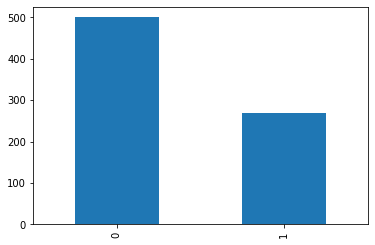

In [ ]:
pdf['Outcome'].value_counts().plot.bar()

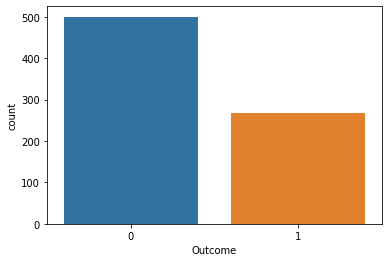

In [ ]:
import seaborn as sns
sns.countplot(x=pdf["Outcome"])

In [ ]:
zeros_percent = round(pdf["Outcome"].value_counts()[0] / len(pdf),2) * 100
zeros_percent

65.0

In [ ]:
ones_percent = round(pdf["Outcome"].value_counts()[1] / len(pdf),2) * 100
ones_percent

35.0

In [ ]:
# Check missing values
pdf.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
from pyspark.sql.functions import isnull, when, count, col
df.select([count(when(isnull(c), c)).alias(c) for c in df.columns]).show()

+-----------+-------+-------------+-------------+-------+---+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin|BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+---+------------------------+---+-------+
|          0|      0|            0|            0|      0|  0|                       0|  0|      0|
+-----------+-------+-------------+-------------+-------+---+------------------------+---+-------+



NO NULL VALUES OBSERVED

In [ ]:
# Assemble the features
required_features = ['Glucose','BloodPressure','BMI','Age']

In [ ]:
pdf[required_features]

,Glucose,BloodPressure,BMI,Age
0,148,72,33.6,50
1,85,66,26.6,31
2,183,64,23.3,32
3,89,66,28.1,21
4,137,40,43.1,33
...,...,...,...,...
763,101,76,32.9,63
764,122,70,36.8,27
765,121,72,26.2,30
766,126,60,30.1,47


VECTOR ASSEMBLER

In [ ]:
from pyspark.ml.feature import VectorAssembler

In [ ]:
assembler = VectorAssembler(inputCols = required_features, outputCol = 'features')

In [ ]:
transformed_data = assembler.transform(df)

In [ ]:
transformed_data.show(5)

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+--------------------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|            features|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+--------------------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|[148.0,72.0,33.6,...|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|[85.0,66.0,26.6,3...|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|[183.0,64.0,23.3,...|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|[89.0,66.0,28.1,2...|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|      1|[137.0,40.0,43.1,...|
+-----------+-------+-----------

TRAIN TEST SPLIT FOR CROSS VALIDATION

In [ ]:
training_data, test_data = transformed_data.randomSplit([0.75, 0.25], seed = 0)

In [ ]:
training_data.count()

573

In [ ]:
test_data.count()

195

In [ ]:
0.25*768

192.0

In [ ]:
val = training_data.count()

573

In [ ]:
training_data.groupby('Outcome').count().select('count').show()

+-----+
|count|
+-----+
|  190|
|  383|
+-----+



In [ ]:
test_data.groupby('Outcome').count().show()

+-------+-----+
|Outcome|count|
+-------+-----+
|      1|   78|
|      0|  117|
+-------+-----+



In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier

In [ ]:
dtc = DecisionTreeClassifier(labelCol='Outcome', featuresCol='features')

In [ ]:
model = dtc.fit(training_data)

In [ ]:
predictions = model.transform(test_data)

In [ ]:
predictions.show(5)

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+--------------------+-------------+--------------------+----------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|            features|rawPrediction|         probability|prediction|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+--------------------+-------------+--------------------+----------+
|          0|     57|           60|            0|      0|21.7|                   0.735| 67|      0|[57.0,60.0,21.7,6...|  [65.0,16.0]|[0.80246913580246...|       0.0|
|          0|     99|            0|            0|      0|25.0|                   0.253| 22|      0|[99.0,0.0,25.0,22.0]|  [117.0,1.0]|[0.99152542372881...|       0.0|
|          0|    100|           70|           26|     50|30.8|                   0.597| 21|      0|[100.0,70.0,30.8,...|  [117.0,1.0]|[0.99152542372881...|       0.0

In [ ]:
pdf_output = predictions.select('prediction').toPandas()

In [ ]:
result = predictions.crosstab("prediction", "Outcome")
result.toPandas()

,prediction_Outcome,0,1
0,1.0,22,48
1,0.0,95,30


In [ ]:
pred = predictions.select('prediction').toPandas()

In [ ]:
actual = predictions.select('Outcome').toPandas()

In [ ]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report 

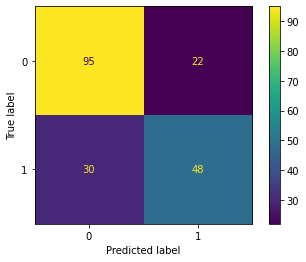

In [ ]:
ConfusionMatrixDisplay.from_predictions(actual, pred)

In [ ]:
accuracy_score(actual, pred)*100

73.33333333333333

In [ ]:
print(classification_report(actual, pred))

              precision    recall  f1-score   support

           0       0.76      0.81      0.79       117
           1       0.69      0.62      0.65        78

    accuracy                           0.73       195
   macro avg       0.72      0.71      0.72       195
weighted avg       0.73      0.73      0.73       195



In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [ ]:
eval = MulticlassClassificationEvaluator(labelCol='Outcome', metricName='accuracy')

In [ ]:
print('Accuracy: ', eval.evaluate(predictions)*100)

Accuracy:  73.33333333333333


NEW PERSON DATA

In [ ]:
new = [89,66,25.3,34]

In [ ]:
test_data.show(3)

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+--------------------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|            features|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+--------------------+
|          0|     57|           60|            0|      0|21.7|                   0.735| 67|      0|[57.0,60.0,21.7,6...|
|          0|     99|            0|            0|      0|25.0|                   0.253| 22|      0|[99.0,0.0,25.0,22.0]|
|          0|    100|           70|           26|     50|30.8|                   0.597| 21|      0|[100.0,70.0,30.8,...|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+--------------------+
only showing top 3 rows



In [ ]:
for required_features in test_data

AttributeError: ignored

SOCIAL NETWORK ADS EXAMPLE


*   ALGO: RF
*   INPUT: Age, estimated salary
*   OUTPUT: purchased

In [ ]:
social_df = spark.read.options(header=True,inferSchema=True).csv("Social_Network_Ads.csv")

In [ ]:
social_df.summary().show()

+-------+-----------------+------+------------------+----------------+------------------+
|summary|          User ID|Gender|               Age| EstimatedSalary|         Purchased|
+-------+-----------------+------+------------------+----------------+------------------+
|  count|              400|   400|               400|             400|               400|
|   mean|  1.56915397575E7|  null|            37.655|         69742.5|            0.3575|
| stddev|71658.32158119006|  null|10.482876597307927|34096.9602824248|0.4798639635968691|
|    min|         15566689|Female|              18.0|         15000.0|                 0|
|    25%|         15625395|  null|              29.0|         43000.0|                 0|
|    50%|         15694288|  null|              37.0|         70000.0|                 0|
|    75%|         15750335|  null|              46.0|         88000.0|                 1|
|    max|         15815236|  Male|              60.0|        150000.0|                 1|
+-------+-

In [ ]:
required_features = ['Age','EstimatedSalary']

In [ ]:
assembler = VectorAssembler(inputCols = required_features, outputCol = 'features')

In [ ]:
transformed_data = assembler.transform(social_df)

In [ ]:
training_data, test_data = transformed_data.randomSplit([0.75, 0.25], seed = 0)

In [ ]:
training_data.count()

301

In [ ]:
from pyspark.ml.classification import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(labelCol='Purchased', featuresCol='features')

In [ ]:
rfc_model = rfc.fit(training_data)

In [ ]:
predictions = rfc_model.transform(test_data)

In [ ]:
predictions.show(5)

+--------+------+----+---------------+---------+---------------+--------------------+--------------------+----------+
| User ID|Gender| Age|EstimatedSalary|Purchased|       features|       rawPrediction|         probability|prediction|
+--------+------+----+---------------+---------+---------------+--------------------+--------------------+----------+
|15566689|Female|35.0|        57000.0|        0| [35.0,57000.0]|[19.8732149328598...|[0.99366074664299...|       0.0|
|15581198|  Male|31.0|        74000.0|        0| [31.0,74000.0]|[19.8732149328598...|[0.99366074664299...|       0.0|
|15581282|  Male|37.0|        74000.0|        0| [37.0,74000.0]|[18.1861589533509...|[0.90930794766754...|       0.0|
|15584320|Female|37.0|       146000.0|        1|[37.0,146000.0]|[1.92157468916605...|[0.09607873445830...|       1.0|
|15584545|Female|32.0|        86000.0|        0| [32.0,86000.0]|[19.8815482661932...|[0.99407741330965...|       0.0|
+--------+------+----+---------------+---------+--------

In [ ]:
pred = predictions.select('prediction').toPandas()

In [ ]:
actual = predictions.select('Purchased').toPandas()

In [ ]:
eval = MulticlassClassificationEvaluator(labelCol='Purchased', metricName='accuracy')

In [ ]:
print('Accuracy: ', eval.evaluate(predictions)*100)

Accuracy:  92.92929292929293
